In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [9]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

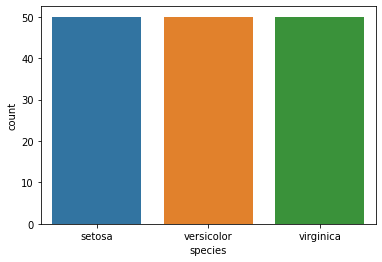

In [10]:
sns.countplot(x='species', data = df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

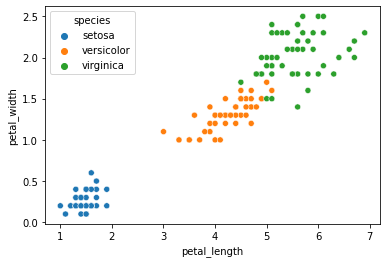

In [12]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

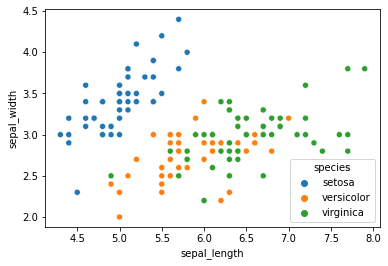

In [13]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species')

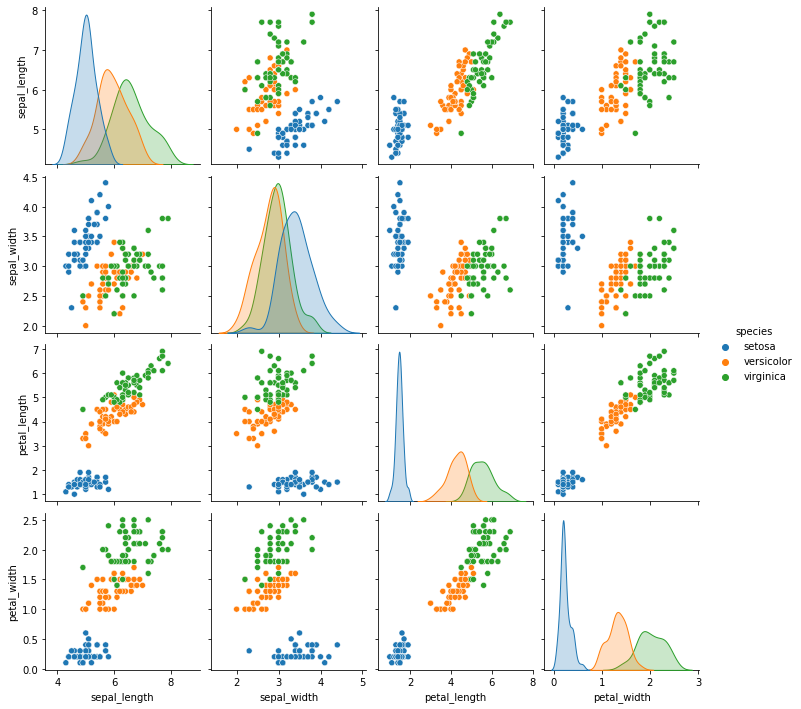

In [15]:
sns.pairplot(df, hue = 'species')

<AxesSubplot:>

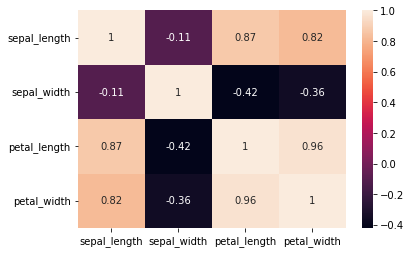

In [16]:
sns.heatmap(df.corr(), annot = True)

In [17]:
X = df.drop('species', axis =1)

In [18]:
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df.shape

(150, 5)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, test_size=0.25, random_state=101)

In [23]:
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)

In [25]:
scaled_X_test = scaler.fit_transform(X_test)

# Training and Performance Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [30]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [31]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [32]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklea

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [38]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [34]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [36]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [37]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [39]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


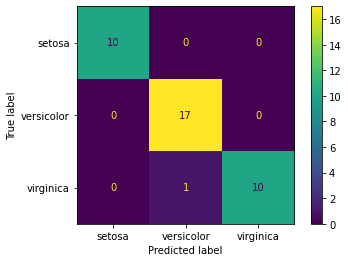

In [40]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
# WHY WITHOUT ENCODING i AM ABLE TO DO CLASSFICATION DESPITE HAVING CATEGORIES